<a href="https://colab.research.google.com/github/FloatinggOnion/pytorch-zero-to-mastery/blob/main/Linear_Regression_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
w = 0.3
b = 0.9

start = 0
end = 10
step = 0.01

X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = X * w + b

X, Y


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900],
         [0.1000],
         [0.1100],
         [0.1200],
         [0.1300],
         [0.1400],
         [0.1500],
         [0.1600],
         [0.1700],
         [0.1800],
         [0.1900],
         [0.2000],
         [0.2100],
         [0.2200],
         [0.2300],
         [0.2400],
         [0.2500],
         [0.2600],
         [0.2700],
         [0.2800],
         [0.2900],
         [0.3000],
         [0.3100],
         [0.3200],
         [0.3300],
         [0.3400],
         [0.3500],
         [0.3600],
         [0.3700],
         [0.3800],
         [0.3900],
         [0.4000],
         [0.4100],
         [0.4200],
         [0.4300],
         [0.4400],
         [0.4500],
         [0.4600],
         [0.4700],
         [0.4800],
         [0.4900],
         [0.5000],
         [0.5100],
         [0.

In [ ]:
train_split = 0.8 * len(X)
train_split = int(train_split)

X_train, y_train = X[:train_split], Y[:train_split]
X_test, y_test = X[train_split:], Y[train_split:]

X_train, X_test, y_train, y_test

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900],
         [0.1000],
         [0.1100],
         [0.1200],
         [0.1300],
         [0.1400],
         [0.1500],
         [0.1600],
         [0.1700],
         [0.1800],
         [0.1900],
         [0.2000],
         [0.2100],
         [0.2200],
         [0.2300],
         [0.2400],
         [0.2500],
         [0.2600],
         [0.2700],
         [0.2800],
         [0.2900],
         [0.3000],
         [0.3100],
         [0.3200],
         [0.3300],
         [0.3400],
         [0.3500],
         [0.3600],
         [0.3700],
         [0.3800],
         [0.3900],
         [0.4000],
         [0.4100],
         [0.4200],
         [0.4300],
         [0.4400],
         [0.4500],
         [0.4600],
         [0.4700],
         [0.4800],
         [0.4900],
         [0.5000],
         [0.5100],
         [0.

In [17]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(5, 4))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

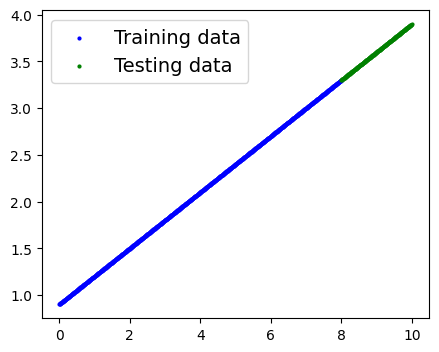

In [18]:
plot_predictions(X_train, y_train, X_test, y_test)

In [19]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [20]:
model_0 = LinearRegressionModel()

model_0.state_dict()

OrderedDict([('weights', tensor([-0.3953])), ('bias', tensor([0.9012]))])

In [22]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [29]:
torch.manual_seed(42)

epochs = 300

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  model_0.train() # set model into training mode

  y_pred = model_0(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval() # set model into testing mode

  if epoch % 20 == 0:
    with torch.inference_mode():
      test_pred = model_0(X_test)

      test_loss = loss_fn(test_pred, y_test.type(torch.float))

      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.021333390846848488 | MAE Test Loss: 0.33381882309913635 
Epoch: 20 | MAE Train Loss: 0.021333390846848488 | MAE Test Loss: 0.33381882309913635 
Epoch: 40 | MAE Train Loss: 0.021333390846848488 | MAE Test Loss: 0.33381882309913635 
Epoch: 60 | MAE Train Loss: 0.021333390846848488 | MAE Test Loss: 0.33381882309913635 
Epoch: 80 | MAE Train Loss: 0.021333390846848488 | MAE Test Loss: 0.33381882309913635 
Epoch: 100 | MAE Train Loss: 0.021333390846848488 | MAE Test Loss: 0.33381882309913635 
Epoch: 120 | MAE Train Loss: 0.021333390846848488 | MAE Test Loss: 0.33381882309913635 
Epoch: 140 | MAE Train Loss: 0.021333390846848488 | MAE Test Loss: 0.33381882309913635 
Epoch: 160 | MAE Train Loss: 0.021333390846848488 | MAE Test Loss: 0.33381882309913635 
Epoch: 180 | MAE Train Loss: 0.021333390846848488 | MAE Test Loss: 0.33381882309913635 
Epoch: 200 | MAE Train Loss: 0.021333390846848488 | MAE Test Loss: 0.33381882309913635 
Epoch: 220 | MAE Train Loss: 0.0213333

In [30]:
model_0.eval() # set model to evaluation mode

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[3.3327],
        [3.3357],
        [3.3388],
        [3.3418],
        [3.3448],
        [3.3478],
        [3.3509],
        [3.3539],
        [3.3569],
        [3.3600],
        [3.3630],
        [3.3660],
        [3.3690],
        [3.3721],
        [3.3751],
        [3.3781],
        [3.3812],
        [3.3842],
        [3.3872],
        [3.3902],
        [3.3933],
        [3.3963],
        [3.3993],
        [3.4024],
        [3.4054],
        [3.4084],
        [3.4114],
        [3.4145],
        [3.4175],
        [3.4205],
        [3.4236],
        [3.4266],
        [3.4296],
        [3.4326],
        [3.4357],
        [3.4387],
        [3.4417],
        [3.4448],
        [3.4478],
        [3.4508],
        [3.4538],
        [3.4569],
        [3.4599],
        [3.4629],
        [3.4660],
        [3.4690],
        [3.4720],
        [3.4750],
        [3.4781],
        [3.4811],
        [3.4841],
        [3.4872],
        [3.4902],
        [3.4932],
        [3.4962],
        [3

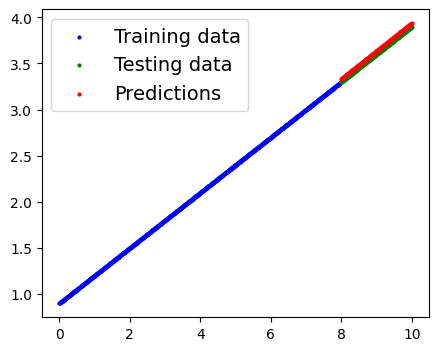

In [31]:
plot_predictions(predictions=y_preds)

In [32]:
# saving model's state dict for later usage

from pathlib import Path

# create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [34]:
# new model that will take on the saved state dict
model_1 = LinearRegressionModel()

model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

model_1.to(device)

model_1.state_dict()

<ipython-input-34-f3dc8342dc48>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


OrderedDict([('weights', tensor([0.3028])), ('bias', tensor([0.9100]))])

In [35]:
# making inference on the test dataset to confirm it's the same
model_1.eval()

with torch.inference_mode():
  y_preds_new = model_1(X_test)

y_preds_new == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        